In [26]:
import numpy as np
import matplotlib.pyplot as plt
def calc_cg(j1,m1,j2,m2,j3,m3):
    fact=np.empty(100)
    fact[0]=1.0
    cgco=0.0
    for i in range(1,100):
        fact[i]=i*fact[i-1]
    if(j3<abs(j1-j2) or (j3>(j1+j2)) or (abs(m1)>j1) or (abs(m2)>j2) or (abs(m3)>j3)):
        cgco=0.0
    else:
        cgco=np.sqrt((j3+j3+1)/fact[j1+j2+j3+1])
        cgco=cgco*np.sqrt(fact[j1+j2-j3]*fact[j2+j3-j1]*fact[j1+j3-j2])
        cgco=cgco*np.sqrt(fact[j1+m1]*fact[j1-m1]*fact[j2+m2]*fact[j2-m2]*fact[j3+m3]*fact[j3-m3])
        sumk=0.0
        for k in range(100):
            cod1=(j1+j2-j3+k < 0.0)
            cod2=(j3-j1-m2+k < 0.0)
            cod3=(j3-j2+m1+k < 0.0)
            cod4=(j1-m1-k < 0.0) 
            cod5=(j2+m2-k < 0.0)
            if(cod1!=0 or cod2!=0 or cod3!=0 or cod4!=0 or cod5!=0):
                continue
            else:
                term=fact[j1+j2-j3-k]*fact[j3-j1-m2+k]*fact[j3-j2+m1+k]*fact[j1-m1-k]*fact[j2+m2-k]*fact[k]
            if(np.mod(k,2)==1):
                term=-term
            sumk=sumk+1.0/term
        cgco=cgco*sumk
    return cgco

In [32]:
print(calc_cg(3,0,1,1,3,1))

-0.7071067811865475


In [49]:
#test calcs for Rp+1

j1,m1,j2,m2,j3,m3 = 3,0,4,1,4,1
numv=9
rpr=np.empty(numv)+0.0

for jj in range(numv):
    cgmid=calc_cg(jj,m1,j2+1,m2,j3,m3)
    cgup =calc_cg(jj,m1,j2+1,m2+1,j3,m3+1)
    cglow=calc_cg(jj,m1,j2+1,m2-1,j3,m3-1)
    cgmid2=calc_cg(jj,m1,j2-1,m2,j3,m3)
    cgup2 =calc_cg(jj,m1,j2-1,m2+1,j3,m3+1)
    cglow2=calc_cg(jj,m1,j2-1,m2-1,j3,m3-1)
    c0   =calc_cg(jj,m1,j2,m2,j3,m3)

    rplus=m3*np.sqrt((j2+1.0)**2-m2**2)*cgmid - \
    0.5*np.sqrt((j3*(j3+1.0)-m3*(m3+1.0))*(j2+m2+2.0)*(j2+m2+1.0))*cgup + \
    0.5*np.sqrt((j3*(j3+1.0)-m3*(m3-1.0))*(j2-m2+2.0)*(j2-m2+1.0))*cglow

    rminus=-m3*np.sqrt(j2**2-m2**2)*cgmid2 - \
    0.5*np.sqrt((j3*(j3+1.0)-m3*(m3+1.0))*(j2-m2)*(j2-m2-1.0))*cgup2 + \
    0.5*np.sqrt((j3*(j3+1.0)-m3*(m3-1.0))*(j2+m2)*(j2+m2-1.0))*cglow2
    
    rpr[jj]=rplus/rminus
    
    print("R_{p+1} = ",rplus,", alpha_{+} = ",rplus/cgmid)
#    if(cgmid2 == cgmid2):
    print("R_{p-1} = ",rminus,", alpha_{-} = ",rminus/cgmid2)
#    if(rminus == rminus):
    print("Rp+1/Rp-1 = ",rplus/rminus)
    print("-----------------")

R_{p+1} =  0.0 , alpha_{+} =  nan
R_{p-1} =  0.0 , alpha_{-} =  nan
Rp+1/Rp-1 =  nan
-----------------
R_{p+1} =  -1.4832396974191306 , alpha_{+} =  2.2453655975512437
R_{p-1} =  1.3228756555322958 , alpha_{-} =  1.8073922282301285
Rp+1/Rp-1 =  -1.1212238211627743
-----------------
R_{p+1} =  -4.86265920515252 , alpha_{+} =  -20.820662813657016
R_{p-1} =  4.310286699115434 , alpha_{-} =  -13.168143377105215
Rp+1/Rp-1 =  -1.1281521496355325
-----------------
R_{p+1} =  4.961409519036341 , alpha_{+} =  15.083699995033257
R_{p-1} =  -4.351444005737053 , alpha_{-} =  13.942740046346707
Rp+1/Rp-1 =  -1.140175425099138
-----------------
R_{p+1} =  3.763089045031908 , alpha_{+} =  -12.247448713915887
R_{p-1} =  -3.2433748657040113 , alpha_{-} =  -7.745966692414833
Rp+1/Rp-1 =  -1.1602387022306428
-----------------
R_{p+1} =  -7.982717345852616 , alpha_{+} =  55.11351921262151
R_{p-1} =  6.678820506395074 , alpha_{-} =  243.99795081106726
Rp+1/Rp-1 =  -1.1952286093343938
-----------------
R_{p

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


AttributeError: 'list' object has no attribute 'set_yscale'

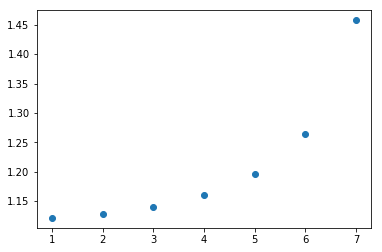

In [59]:
ax=plt.plot(abs(rpr),'o')
#ax.set_yscale('log')